# **UF-6 Actividad Evaluable: Mapas de calor y boxplots**

Alumnos:

José María Colombres Elguea | A01734153

Santiago Gael Gallardo Parente | A01734347

Miguel Sebastián Carreto Bahena | A01735592

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# **Facturación**

(df_facturacion,df_devoluciones,df_notascredito,df_clientes)

## **Preparación**

In [ ]:
df_facturacion = pd.read_excel("FACTURACION_FINAL.xlsx",sheet_name="FACTURACION")
#df_facturacion["VENDEDOR"].astype(float)

df_devoluciones = pd.read_excel("FACTURACION_FINAL.xlsx",sheet_name="DEVOLUCIONES")

df_notascredito = pd.read_excel("FACTURACION_FINAL.xlsx",sheet_name="NOTAS DE CREDITO")

df_clientes = pd.read_excel("FACTURACION_FINAL.xlsx",sheet_name="CLIENTES")

df_clientes_frecuentes = pd.read_excel("FACTURACION_FINAL.xlsx",sheet_name="CLIENTES ACTIVOS")

## **Análisis general**

In [ ]:
df_facturacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10752 entries, 0 to 10751
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CVE_DOC        10752 non-null  object        
 1   CLIENTE        10752 non-null  object        
 2   STATUS         10752 non-null  object        
 3   VENDEDOR       10752 non-null  int64         
 4   FECHA_ELAB     10752 non-null  datetime64[ns]
 5   FECHA_VEN      10752 non-null  datetime64[ns]
 6   FECHA_CANCELA  281 non-null    datetime64[ns]
 7   CAN_TOT        10752 non-null  float64       
 8   DES_TOT        10752 non-null  float64       
 9   TOTAL          10752 non-null  float64       
 10  RFC            10752 non-null  object        
 11  CAT_LB         10752 non-null  object        
dtypes: datetime64[ns](3), float64(3), int64(1), object(5)
memory usage: 1008.1+ KB


In [ ]:
df_devoluciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   TIP_OP         187 non-null    object        
 1   CVE_DEV        187 non-null    object        
 2   CLIENTE        187 non-null    object        
 3   STATUS         187 non-null    object        
 4   VENDEDOR       187 non-null    int64         
 5   CVE_PEDI       187 non-null    object        
 6   FECHA_VEN      187 non-null    datetime64[ns]
 7   FECHA_CANCELA  4 non-null      datetime64[ns]
 8   CAN_TOT        187 non-null    float64       
 9   FECHA_ELAB     187 non-null    datetime64[ns]
 10  RFC            187 non-null    object        
 11  FOLIO          187 non-null    int64         
 12  CVE_DOC        181 non-null    object        
 13  CAT_LB         187 non-null    object        
dtypes: datetime64[ns](3), float64(1), int64(2), object(8)
memory usage: 20.6+ 

In [ ]:
df_notascredito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   TIP_OP         498 non-null    object        
 1   CVE_NC         498 non-null    object        
 2   CLIENTE        498 non-null    int64         
 3   STATUS         498 non-null    object        
 4   VENDEDOR       498 non-null    int64         
 5   CVE_PEDI       498 non-null    object        
 6   FECHA_VEN      498 non-null    datetime64[ns]
 7   FECHA_CANCELA  14 non-null     datetime64[ns]
 8   CAN_TOT        498 non-null    float64       
 9   FECHA_ELAB     498 non-null    datetime64[ns]
 10  RFC            498 non-null    object        
 11  FOLIO          498 non-null    int64         
 12  QCUT           498 non-null    object        
dtypes: datetime64[ns](3), float64(1), int64(3), object(6)
memory usage: 50.7+ KB


In [ ]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5025 entries, 0 to 5024
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   CLIENTE  5025 non-null   object
 1   RFC      5010 non-null   object
 2   NOMBRE   5024 non-null   object
dtypes: object(3)
memory usage: 117.9+ KB


In [ ]:
df_facturacion.describe()

,VENDEDOR,CAN_TOT,DES_TOT,TOTAL
count,10752.000000,10752.000000,10752.000000,10752.000000
mean,2.354539,4538.133347,17.858850,4520.274498
std,1.165677,11862.844722,436.037916,11770.480980
min,0.000000,1.000000,0.000000,1.000000
25%,2.000000,570.500000,0.000000,570.500000
50%,2.000000,1462.280000,0.000000,1455.166200
75%,2.000000,3984.990000,0.000000,3981.482500
max,12.000000,412116.920000,23386.950000,412116.920000


In [ ]:
df_devoluciones.describe()

,VENDEDOR,CAN_TOT,FOLIO
count,187.000000,187.000000,187.000000
mean,2.791444,9300.749203,97.481283
std,1.654038,12491.230198,62.286050
min,0.000000,125.000000,1.000000
25%,2.000000,2195.500000,48.500000
50%,2.000000,4978.500000,95.000000
75%,4.000000,10972.561250,142.500000
max,6.000000,74700.000000,501.000000


In [ ]:
df_notascredito.describe()

,CLIENTE,VENDEDOR,CAN_TOT,FOLIO
count,498.000000,498.000000,498.000000,498.000000
mean,5724.638554,2.381526,4505.181272,504.654618
std,2110.298382,1.186366,10730.037581,148.789269
min,47.000000,0.000000,44.663700,251.000000
25%,4846.750000,2.000000,854.717250,375.250000
50%,5926.000000,2.000000,1997.128400,501.500000
75%,6889.500000,2.000000,4418.855000,634.750000
max,9564.000000,12.000000,137250.000000,761.000000


## **Gráficas**

### **df_facturacion**

<Axes: >

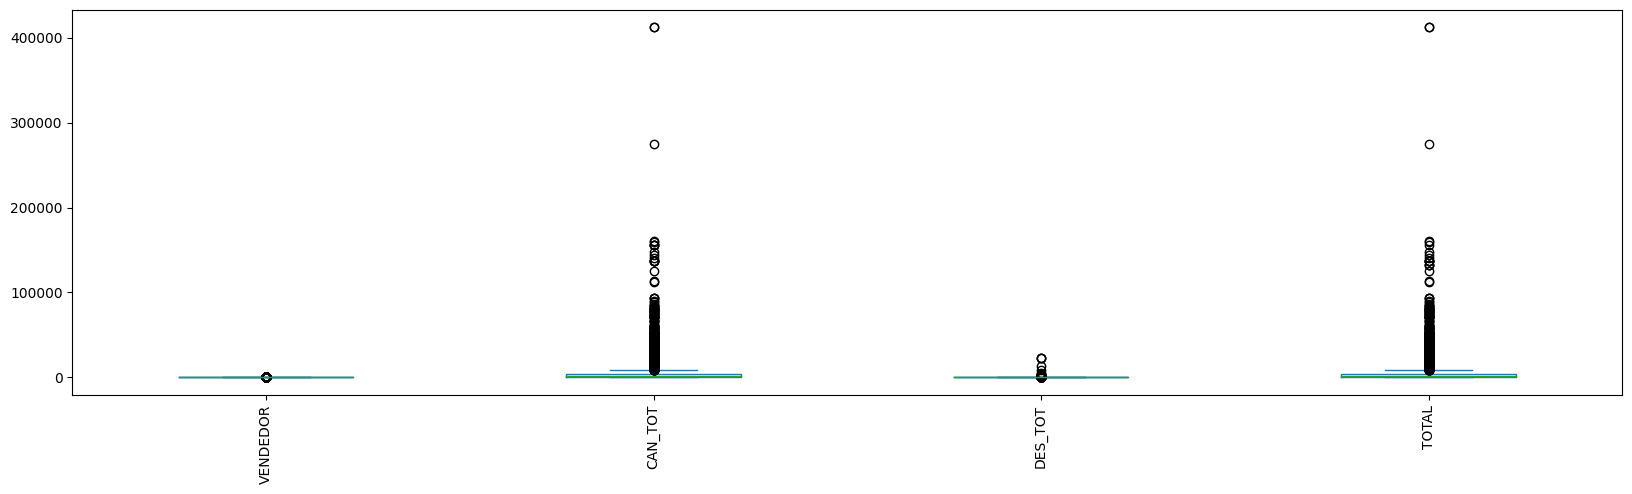

In [ ]:
df_facturacion.plot.box(figsize=(20,5), rot=90)

<ipython-input-16-e56386815d87>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_facturacion.corr()


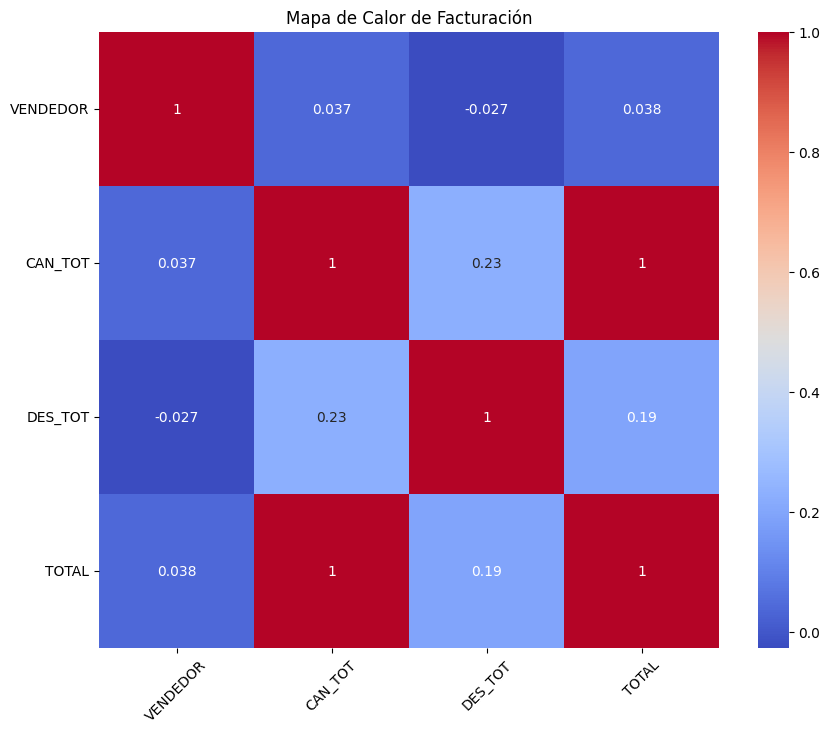

In [ ]:
correlation_matrix = df_facturacion.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

#Configuración gráfica
plt.title('Mapa de Calor de Facturación')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.show()

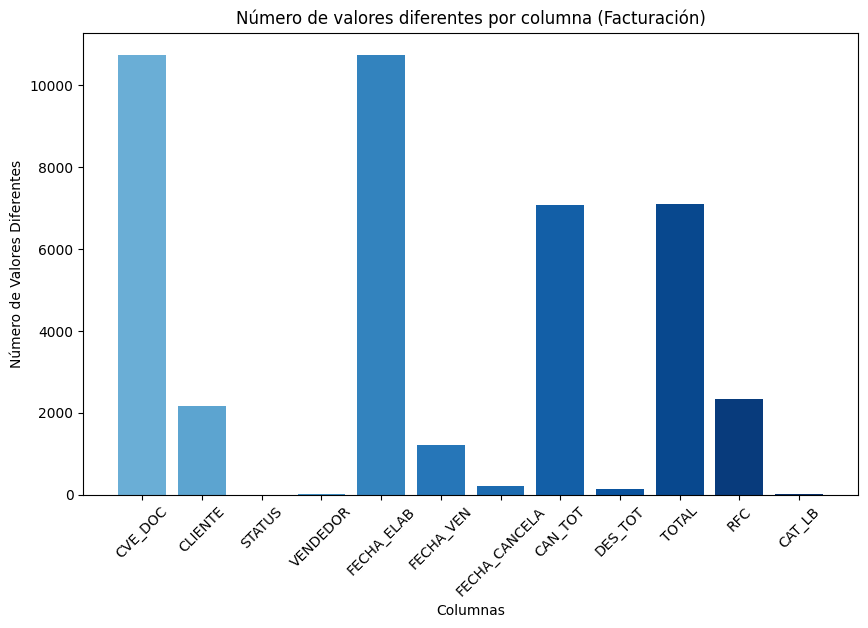

In [ ]:
# Gráfica de valores únicos
unique_values_count = df_facturacion.nunique()

blues = plt.cm.Blues(np.linspace(0.5, 1, 12))

plt.figure(figsize=(10, 6))
plt.bar(unique_values_count.index, unique_values_count, color=blues)

plt.xlabel('Columnas')
plt.ylabel('Número de Valores Diferentes')
plt.title('Número de valores diferentes por columna (Facturación)')
plt.xticks(rotation=45)

plt.show()

### **df_devoluciones**

<Axes: >

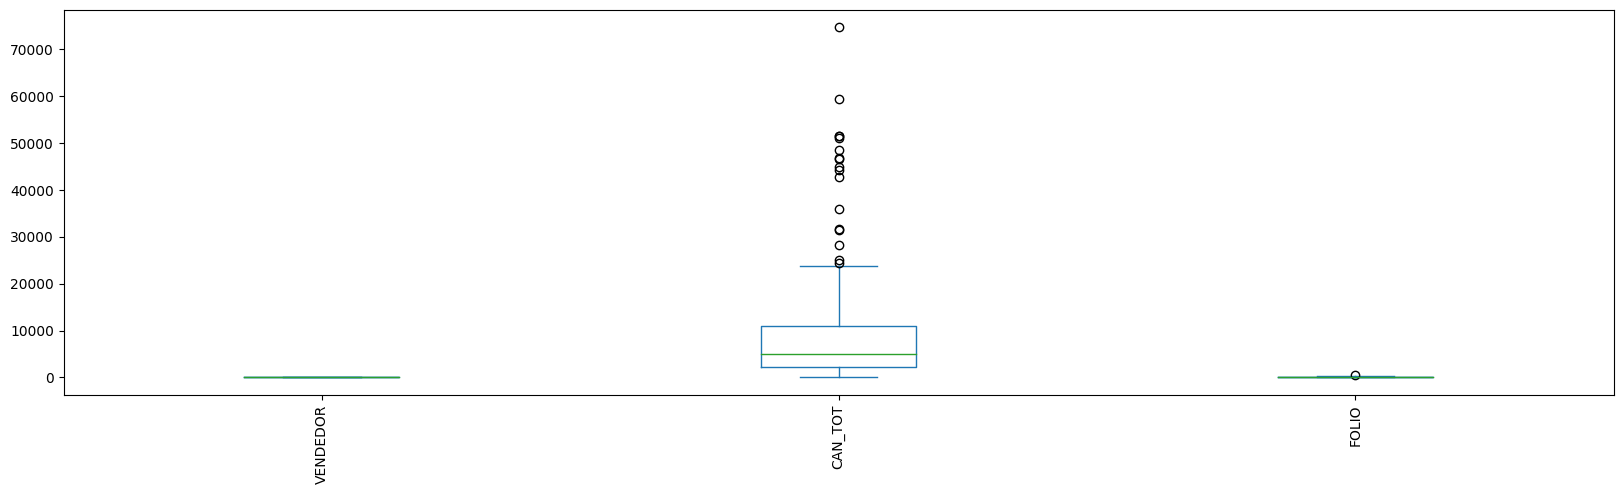

In [ ]:
df_devoluciones.plot.box(figsize=(20,5), rot=90)

<ipython-input-18-3566e67b5b5c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix2 = df_devoluciones.corr()


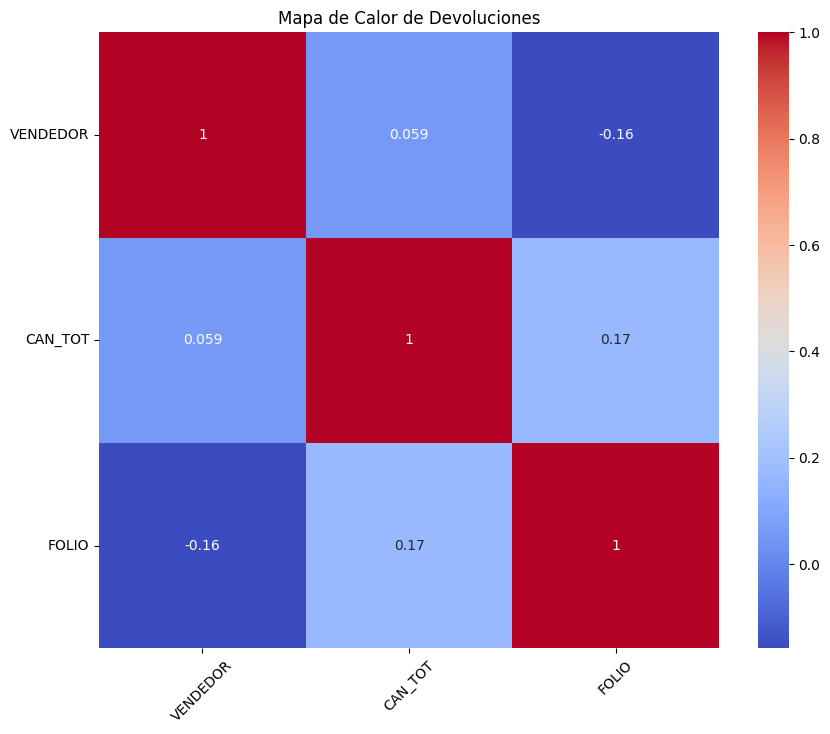

In [ ]:
correlation_matrix2 = df_devoluciones.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm')

#Configuración gráfica
plt.title('Mapa de Calor de Devoluciones')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.show()


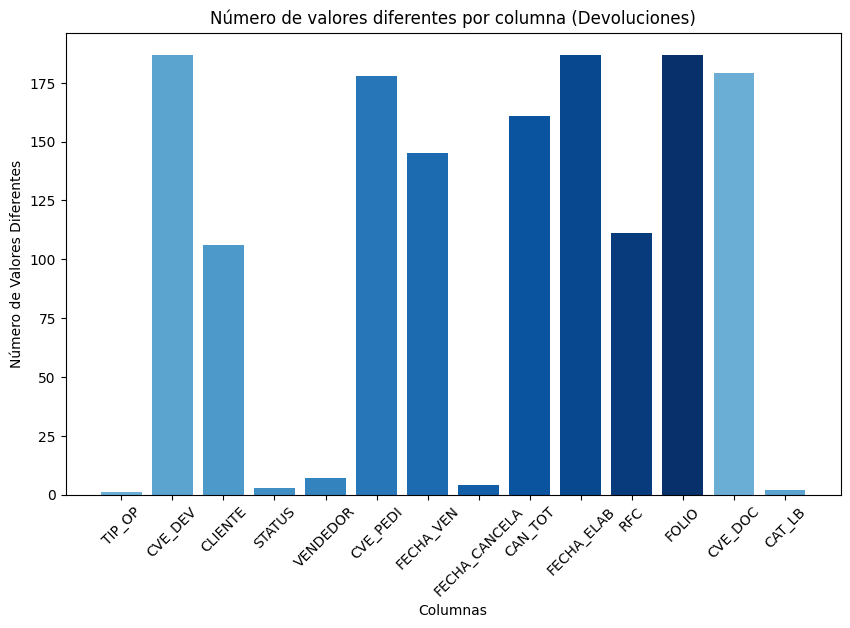

In [ ]:
# Gráfica de valores únicos
unique_values_count2 = df_devoluciones.nunique()

blues = plt.cm.Blues(np.linspace(0.5, 1, 12))

plt.figure(figsize=(10, 6))
plt.bar(unique_values_count2.index, unique_values_count2, color=blues)

plt.xlabel('Columnas')
plt.ylabel('Número de Valores Diferentes')
plt.title('Número de valores diferentes por columna (Devoluciones)')
plt.xticks(rotation=45)

plt.show()

### **df_notascredito**

<Axes: >

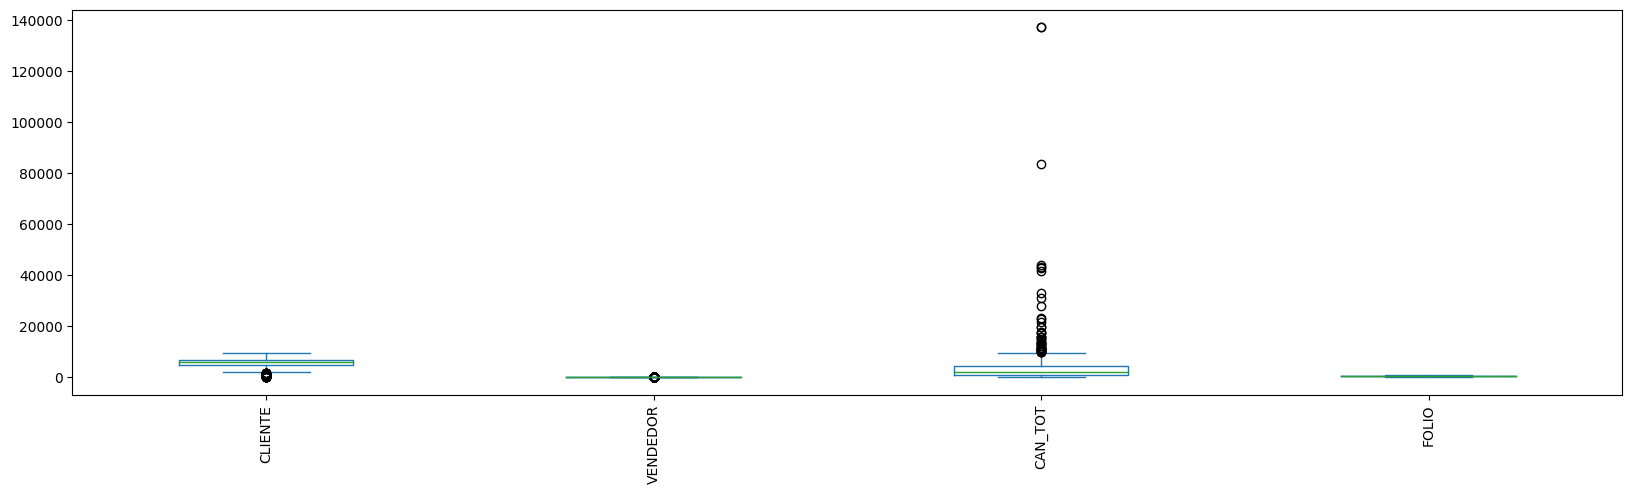

In [ ]:
df_notascredito.plot.box(figsize=(20,5), rot=90)

<ipython-input-30-1a8b7b735cc1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix3 = df_notascredito.corr()


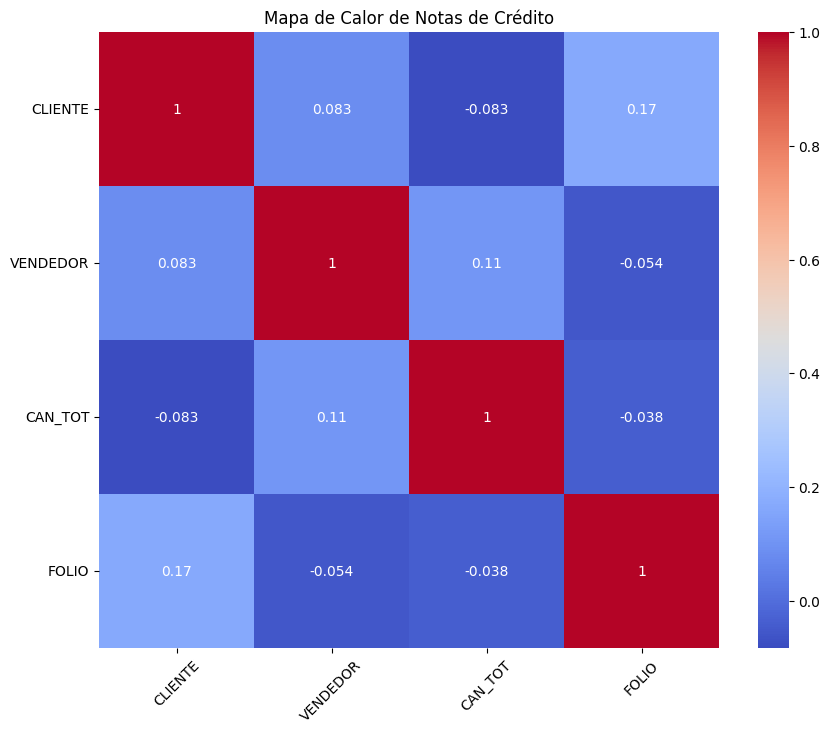

In [ ]:
correlation_matrix3 = df_notascredito.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix3, annot=True, cmap='coolwarm')

#Configuración gráfica
plt.title('Mapa de Calor de Notas de Crédito')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.show()


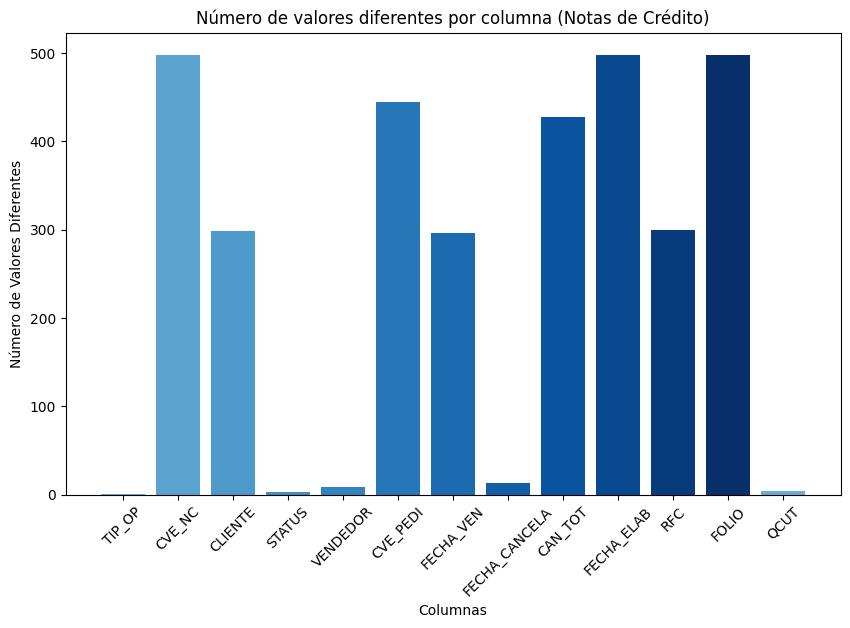

In [ ]:
# Gráfica de valores únicos
unique_values_count3 = df_notascredito.nunique()

blues = plt.cm.Blues(np.linspace(0.5, 1, 12))

plt.figure(figsize=(10, 6))
plt.bar(unique_values_count3.index, unique_values_count3, color=blues)

plt.xlabel('Columnas')
plt.ylabel('Número de Valores Diferentes')
plt.title('Número de valores diferentes por columna (Notas de Crédito)')
plt.xticks(rotation=45)

plt.show()

### **df_clientes & df_clientesfrecuentes**

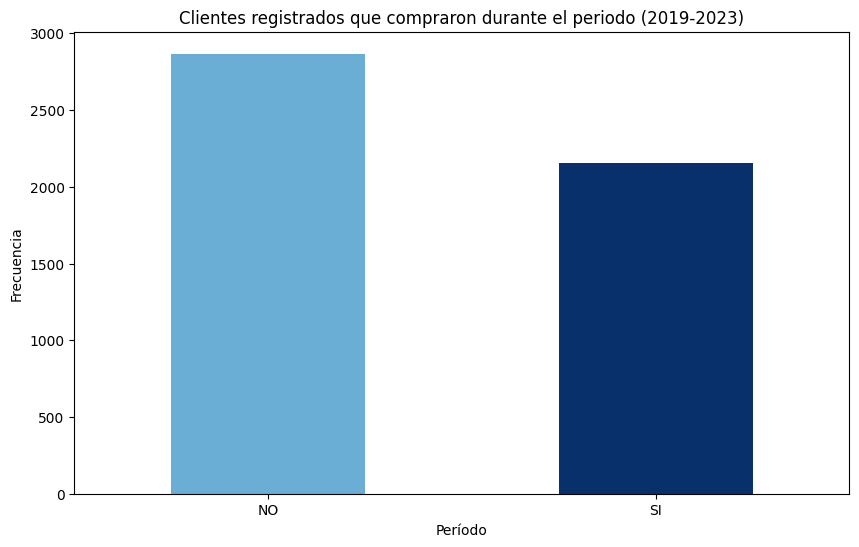

In [ ]:
#Gráfica de barras de la columna "PERIODO 19-23"

blues2 = plt.cm.Blues(np.linspace(0.5, 1, 2))

plt.figure(figsize=(10, 6))
df_clientes_frecuentes['PERIODO 19-23'].value_counts().sort_index().plot(kind='bar', color=blues2)

# Configuración adicional de la gráfica
plt.xlabel('Período')
plt.ylabel('Frecuencia')
plt.title('Clientes registrados que compraron durante el periodo (2019-2023)')
plt.xticks(rotation=0)

# Mostrar la gráfica
plt.show()


# **Gastos & Costos**

## **Preparación**

In [ ]:
df_2020= pd.read_excel("GastosCostos2023_adecuado.xlsx", sheet_name="2020")
df_2021= pd.read_excel("GastosCostos2023_adecuado.xlsx", sheet_name="2021")
df_2022= pd.read_excel("GastosCostos2023_adecuado.xlsx", sheet_name="2022")
df_2023= pd.read_excel("GastosCostos2023_adecuado.xlsx", sheet_name="2023")

In [ ]:
df_2020['IVA'] = df_2020['IVA'].fillna(0)
df_2020['TOTAL MX'] = df_2020['TOTAL MX'].fillna(0)

df_2021['IVA'] = df_2021['IVA'].fillna(0)
df_2021['TOTAL MX'] = df_2021['TOTAL MX'].fillna(0)

df_2022['IVA'] = df_2022['IVA'].fillna(0)
df_2022['TOTAL MX'] = df_2022['TOTAL MX'].fillna(0)

df_2023['IVA'] = df_2023['IVA'].fillna(0)
df_2023['TOTAL MX'] = df_2023['TOTAL MX'].fillna(0)

df_2021['IVA'] = df_2021['IVA'].fillna(0)
df_2021['TOTAL MX'] = df_2021['TOTAL MX'].fillna(0)
df_2021['IMPORTE'] = df_2021['IMPORTE'].fillna(0)

df_2020["IMPORTE"]=df_2020['IMPORTE'].fillna(0)
df_2021["IMPORTE"]=df_2021['IMPORTE'].fillna(0)
df_2022["Importe"]=df_2022['Importe'].fillna(0)
df_2023["Importe"]=df_2023['Importe'].fillna(0)


df_2021['FECHA'] = df_2021['FECHA'].fillna(method='ffill')
df_2021['FECHA'] = df_2021['FECHA'].fillna(method='ffill')
df_2022['Fecha'] = df_2022['Fecha'].fillna(method='ffill')
df_2023['Fecha'] = df_2023['Fecha'].fillna(method='ffill')


#df_2020["MP"].fillna("omitido", inplace=True)
df_2021["MP"].fillna("omitido", inplace=True)
df_2022["MP"].fillna("omitido", inplace=True)
df_2023["MP"].fillna("omitido", inplace=True)

## **Análisis general**

In [ ]:
df_2020.info()
df_2021.info()
df_2022.info()
df_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3342 entries, 0 to 3341
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        3342 non-null   datetime64[ns]
 1   FOLIO        3153 non-null   object        
 2   UUID         3342 non-null   object        
 3   RFC          3342 non-null   object        
 4   PROVEEDOR    3342 non-null   object        
 5   TIPO GASTO   3342 non-null   object        
 6   GASTO        840 non-null    object        
 7   DESCRIPCION  3342 non-null   object        
 8   TC           2951 non-null   float64       
 9   IMPORTE      3342 non-null   float64       
 10  IVA          3342 non-null   float64       
 11  RET ISR      3342 non-null   float64       
 12  RET IVA      3342 non-null   float64       
 13  TOTAL MX     3342 non-null   float64       
 14  TOTAL SAT    3342 non-null   float64       
 15  TIPO         3341 non-null   object        
 16  STATUS

In [ ]:
df_2020.describe()
df_2021.describe()
df_2022.describe()
df_2023.describe()

,FP,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX,TOTAL SAT
count,326.000000,397.000000,397.000000,397.000000,397.000000,397.000000,0.0,397.000000,397.000000
mean,44.000000,1.091556,3924.438690,497.410202,31.016146,37.673728,NaN,4353.159018,4353.159018
std,47.606464,1.288529,7544.268488,1088.121502,300.052953,328.266006,NaN,8288.435294,8288.435294
min,1.000000,1.000000,-944.000000,-151.040000,0.000000,0.000000,NaN,-1095.040000,-1095.040000
25%,3.000000,1.000000,116.380000,0.000000,0.000000,0.000000,NaN,135.000000,135.000000
50%,3.000000,1.000000,770.000000,75.170000,0.000000,0.000000,NaN,893.200000,893.200000
75%,99.000000,1.000000,3700.000000,448.000000,0.000000,0.000000,NaN,4292.000000,4292.000000
max,99.000000,19.508900,46802.990000,7488.480000,3000.000000,3200.000000,NaN,54291.470000,54291.470000


## **Gráficas**

### **2020**

<Axes: >

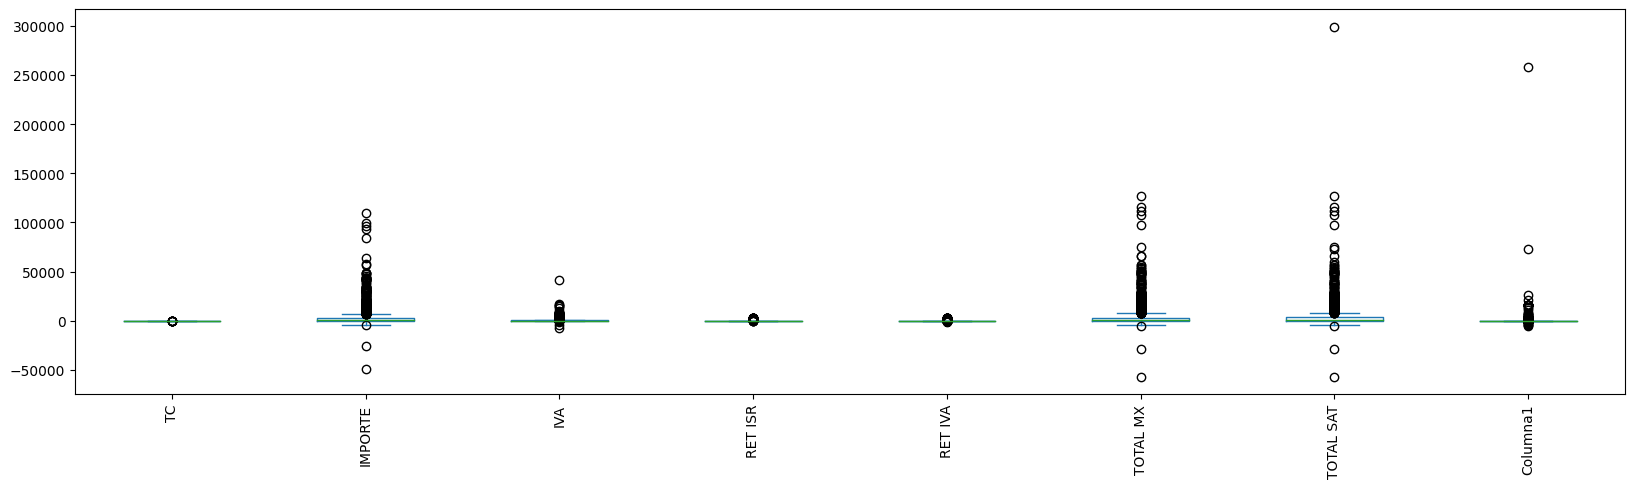

In [ ]:
df_2020.plot.box(figsize=(20,5), rot=90)

<ipython-input-16-d4eed1d1d6df>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_2020.corr()


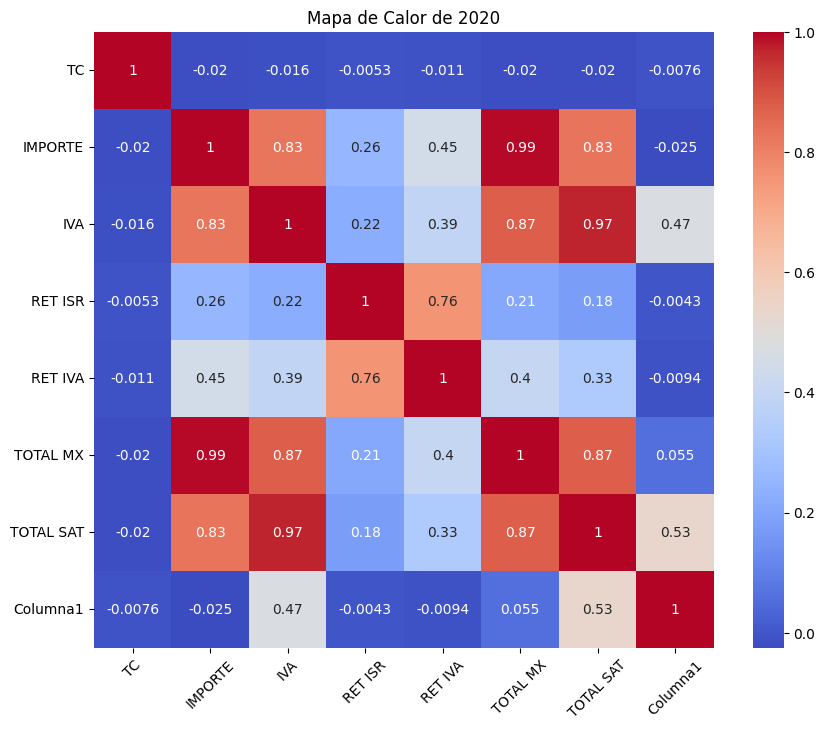

In [ ]:
correlation_matrix = df_2020.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

#Configuración gráfica
plt.title('Mapa de Calor de 2020')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.show()

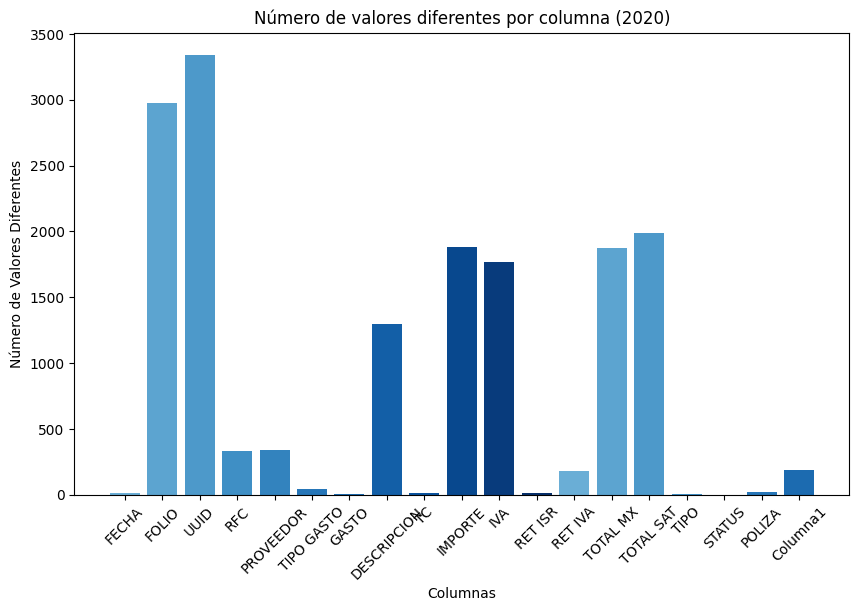

In [ ]:
# Gráfica de valores únicos
unique_values_count = df_2020.nunique()

blues = plt.cm.Blues(np.linspace(0.5, 1, 12))

plt.figure(figsize=(10, 6))
plt.bar(unique_values_count.index, unique_values_count, color=blues)

plt.xlabel('Columnas')
plt.ylabel('Número de Valores Diferentes')
plt.title('Número de valores diferentes por columna (2020)')
plt.xticks(rotation=45)

plt.show()

### **2021**

<Axes: >

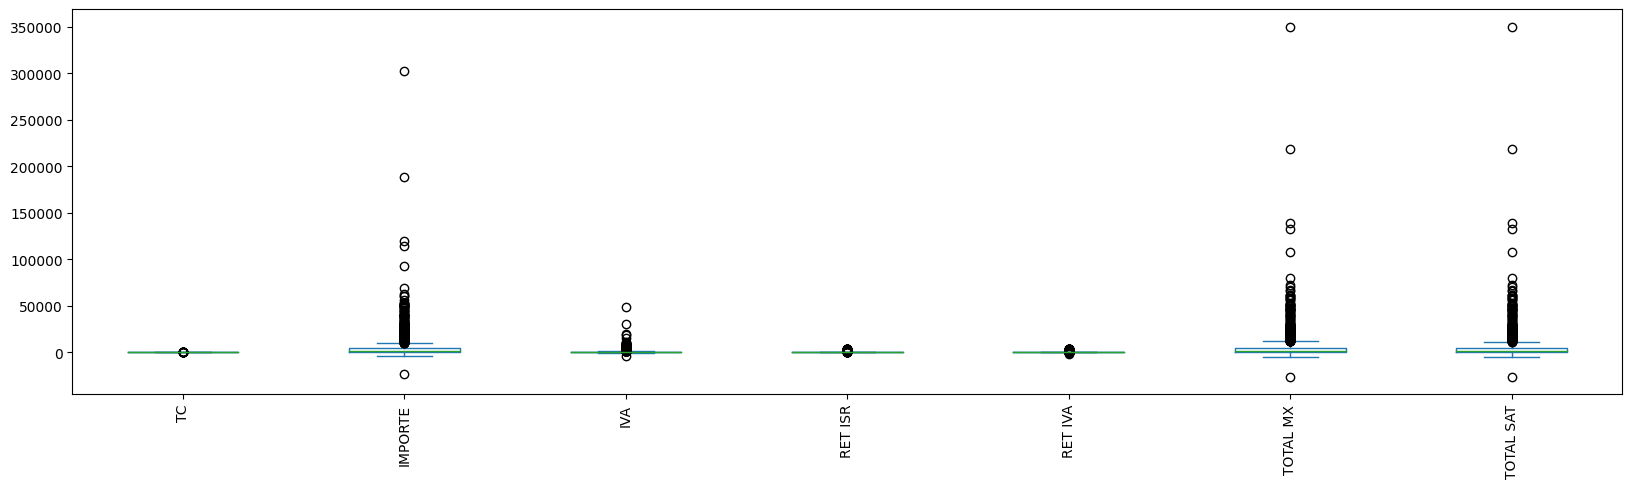

In [ ]:
df_2021.plot.box(figsize=(20,5), rot=90)

<ipython-input-19-93946765168a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_2021.corr()


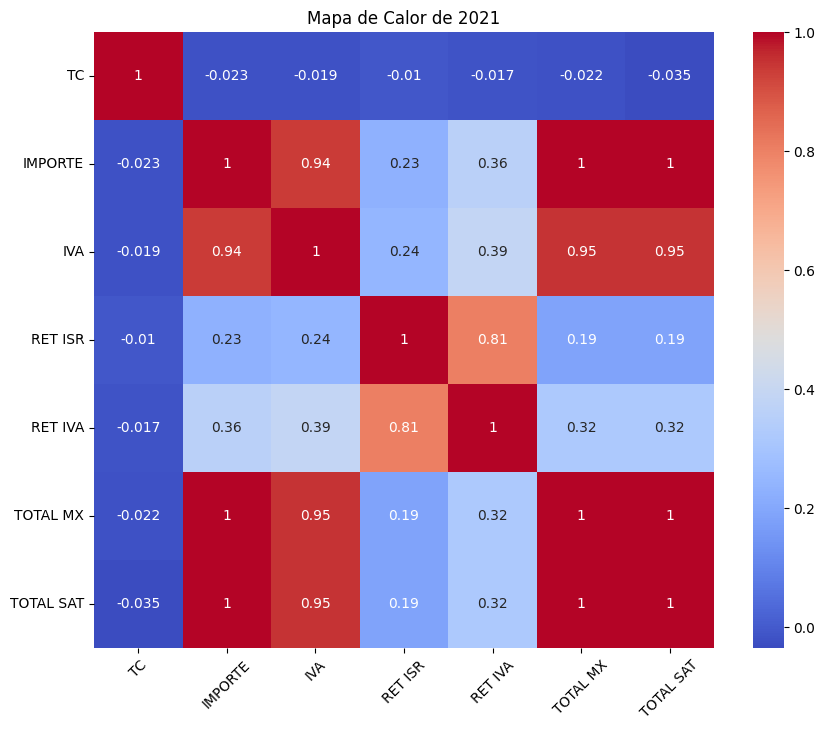

In [ ]:
correlation_matrix = df_2021.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

#Configuración gráfica
plt.title('Mapa de Calor de 2021')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.show()

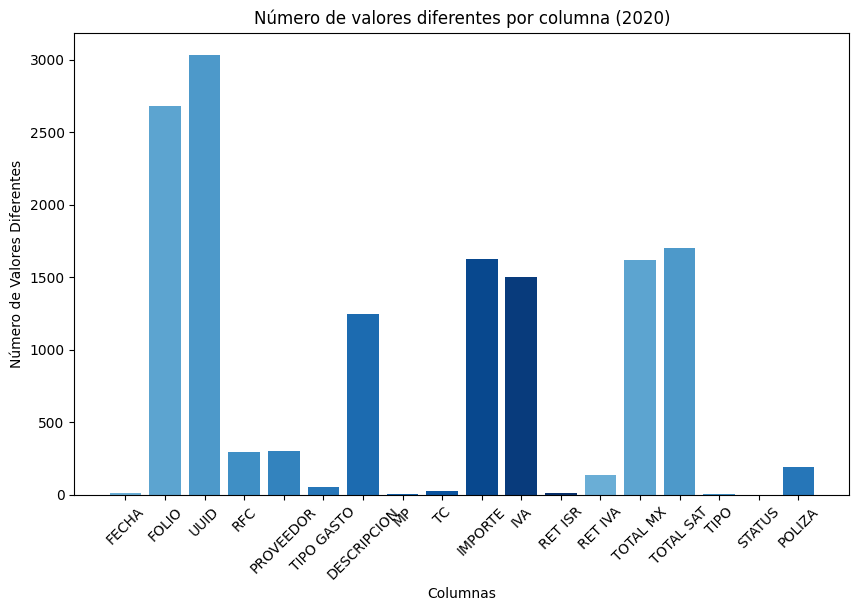

In [ ]:
# Gráfica de valores únicos
unique_values_count = df_2021.nunique()

blues = plt.cm.Blues(np.linspace(0.5, 1, 12))

plt.figure(figsize=(10, 6))
plt.bar(unique_values_count.index, unique_values_count, color=blues)

plt.xlabel('Columnas')
plt.ylabel('Número de Valores Diferentes')
plt.title('Número de valores diferentes por columna (2020)')
plt.xticks(rotation=45)

plt.show()

### **2022**

<Axes: >

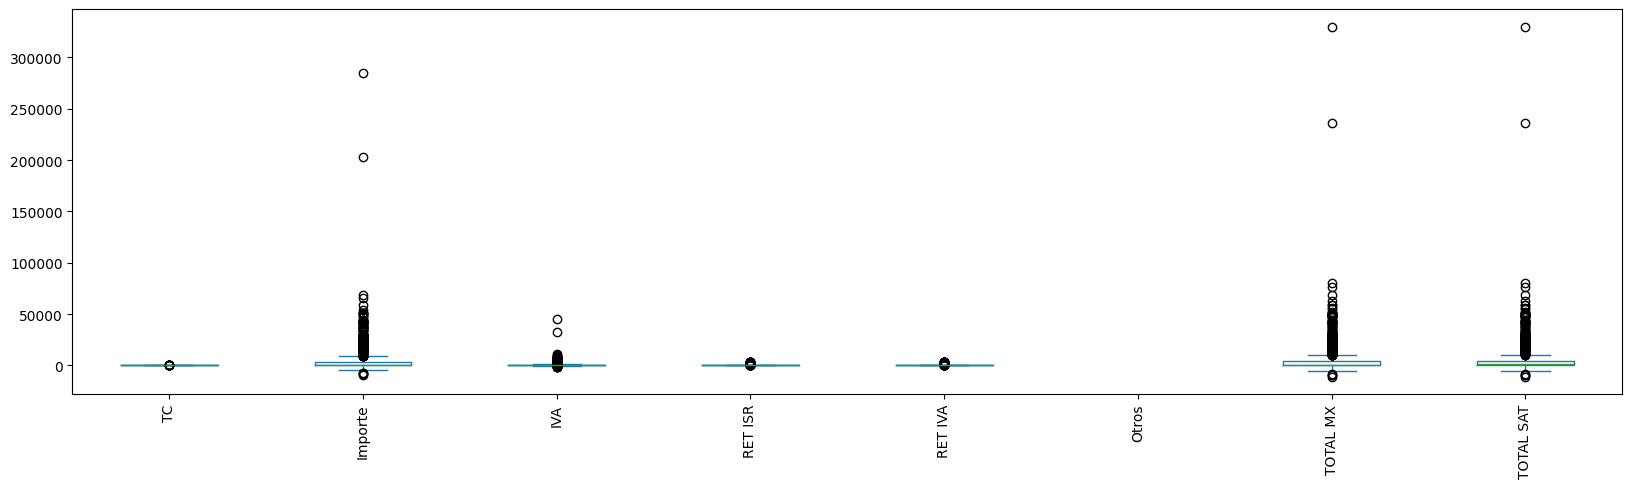

In [ ]:
df_2022.plot.box(figsize=(20,5), rot=90)

<ipython-input-22-90c97e7d4991>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_2022.corr()


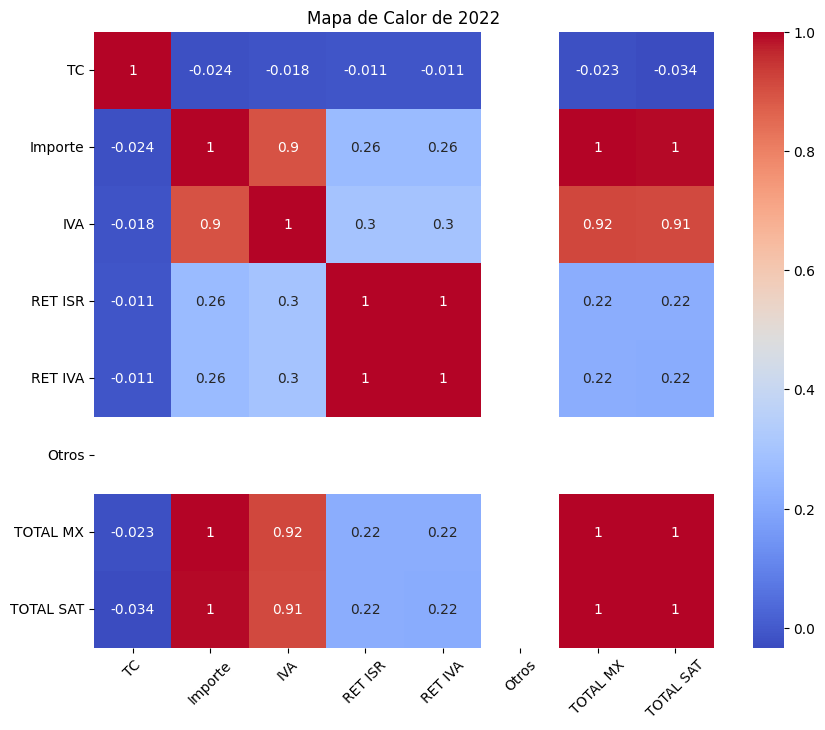

In [ ]:
correlation_matrix = df_2022.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

#Configuración gráfica
plt.title('Mapa de Calor de 2022')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.show()

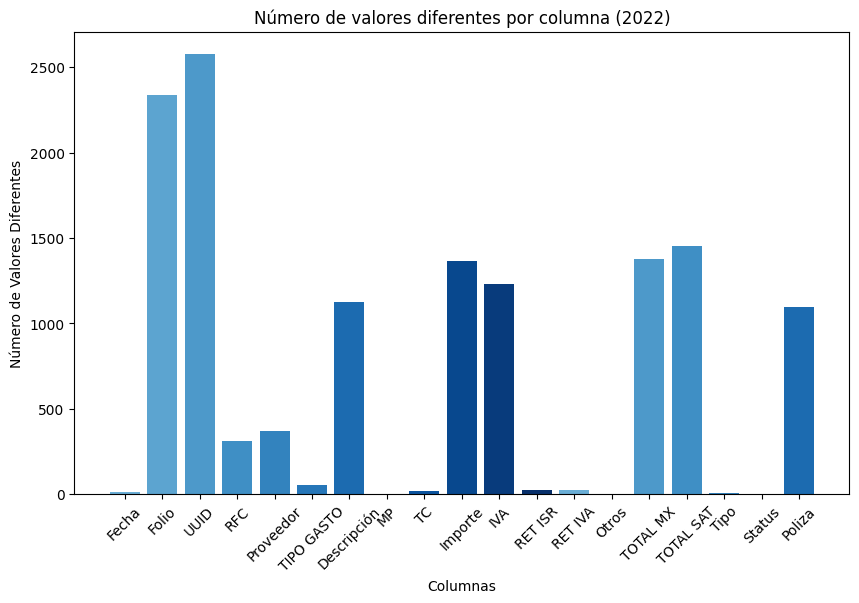

In [ ]:
# Gráfica de valores únicos
unique_values_count = df_2022.nunique()

blues = plt.cm.Blues(np.linspace(0.5, 1, 12))

plt.figure(figsize=(10, 6))
plt.bar(unique_values_count.index, unique_values_count, color=blues)

plt.xlabel('Columnas')
plt.ylabel('Número de Valores Diferentes')
plt.title('Número de valores diferentes por columna (2022)')
plt.xticks(rotation=45)

plt.show()

### **2023**

<Axes: >

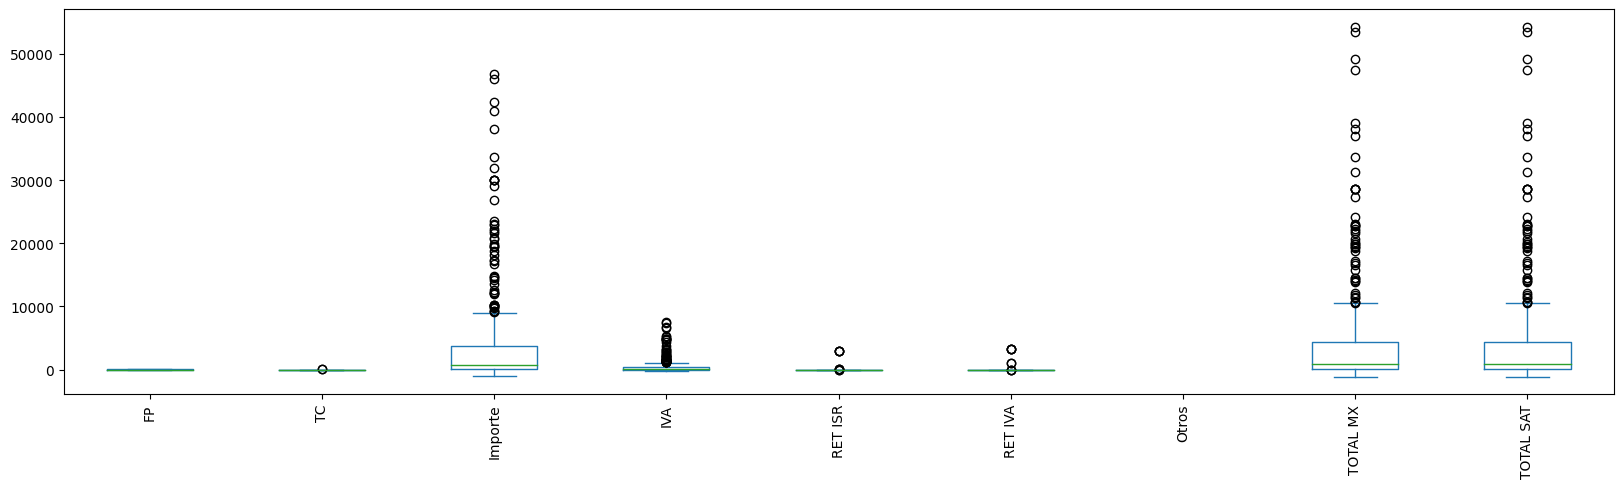

In [ ]:
df_2023.plot.box(figsize=(20,5), rot=90)

<ipython-input-25-c5220e72f8c1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_2023.corr()


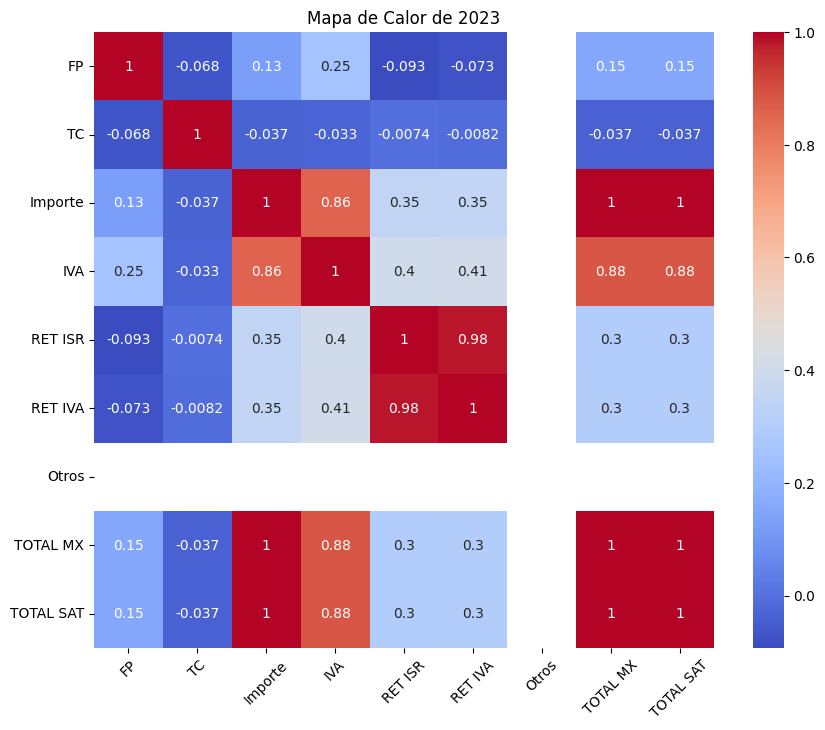

In [ ]:
correlation_matrix = df_2023.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

#Configuración gráfica
plt.title('Mapa de Calor de 2023')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.show()

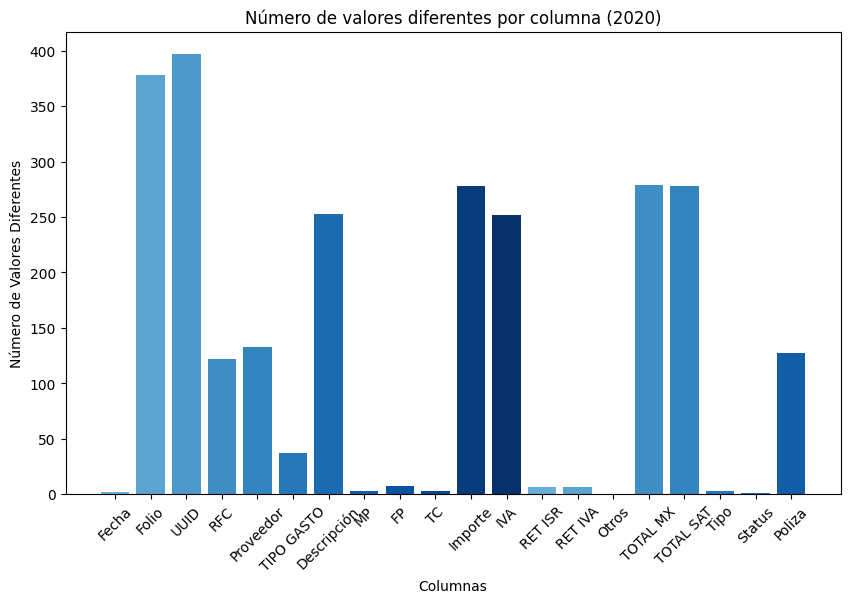

In [ ]:
# Gráfica de valores únicos
unique_values_count = df_2023.nunique()

blues = plt.cm.Blues(np.linspace(0.5, 1, 12))

plt.figure(figsize=(10, 6))
plt.bar(unique_values_count.index, unique_values_count, color=blues)

plt.xlabel('Columnas')
plt.ylabel('Número de Valores Diferentes')
plt.title('Número de valores diferentes por columna (2020)')
plt.xticks(rotation=45)

plt.show()

# **Antiguedad de saldos**

## **Preparación**

In [ ]:
df_saldos = pd.read_excel("ant_saldos.xlsx")
df_saldos

,NO_CLIENTE,NOMBRE,FACTURA,FECHA_FACTURA,FECHA_VENCIMIENTO,MONTO_ADEUDADO,DIAS_ADEUDO
0,6401,DONGA HWASUNG MEXICO,F40238,2023-02-24,2023-03-26,97485.94,30
1,6401,DONGA HWASUNG MEXICO,F40353,2023-03-14,2023-04-13,97485.94,30
2,4598,PROVEEDORA DE SEGURIDAD INDUSTRIAL DEL GOLFO,F40352,2023-03-14,2023-04-13,64916.21,30
3,3930,INDUSTRIAS LANCERMEX,F40217,2023-02-23,2023-03-25,52715.74,30
4,4712,HELVEX,F40173,2023-02-17,2023-04-03,50639.80,45
...,...,...,...,...,...,...,...
95,1284,TERMOFORMADOS,F40349,2023-03-14,2023-04-13,799.24,30
96,2549,MARATHON SYSTEMS CONTROL,F39912,2023-01-12,2023-02-11,765.60,30
97,357,TRATAMIENTOS TERMICOS DE QUERETARO,F39931,2023-01-17,2023-02-01,555.19,15
98,161,LBQ FOUNDRY,F40161,2023-02-16,2023-03-18,366.04,30


## **Análisis general**

In [ ]:
df_saldos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   NO_CLIENTE         100 non-null    object        
 1   NOMBRE             100 non-null    object        
 2   FACTURA            100 non-null    object        
 3   FECHA_FACTURA      100 non-null    datetime64[ns]
 4   FECHA_VENCIMIENTO  100 non-null    datetime64[ns]
 5   MONTO_ADEUDADO     100 non-null    float64       
 6   DIAS_ADEUDO        100 non-null    int64         
dtypes: datetime64[ns](2), float64(1), int64(1), object(3)
memory usage: 5.6+ KB


In [ ]:
df_saldos.describe()

,MONTO_ADEUDADO,DIAS_ADEUDO
count,100.000000,100.000000
mean,15449.846800,35.550000
std,18115.506991,15.318422
min,191.040000,8.000000
25%,4427.615000,30.000000
50%,8558.455000,30.000000
75%,19629.085000,45.000000
max,97485.940000,90.000000


## **Gráficas**

### **df_saldos**

<Axes: >

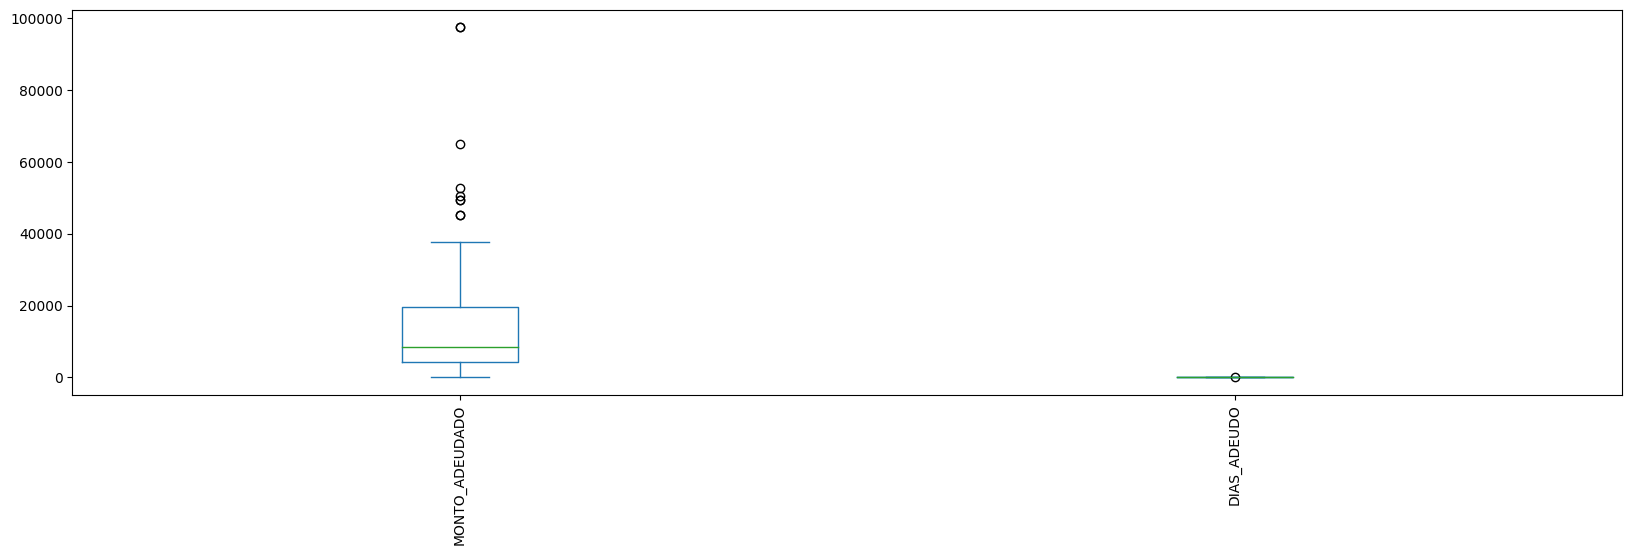

In [ ]:
df_saldos.plot.box(figsize=(20,5), rot=90)

<ipython-input-16-017dcacc18fa>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_saldos.corr()


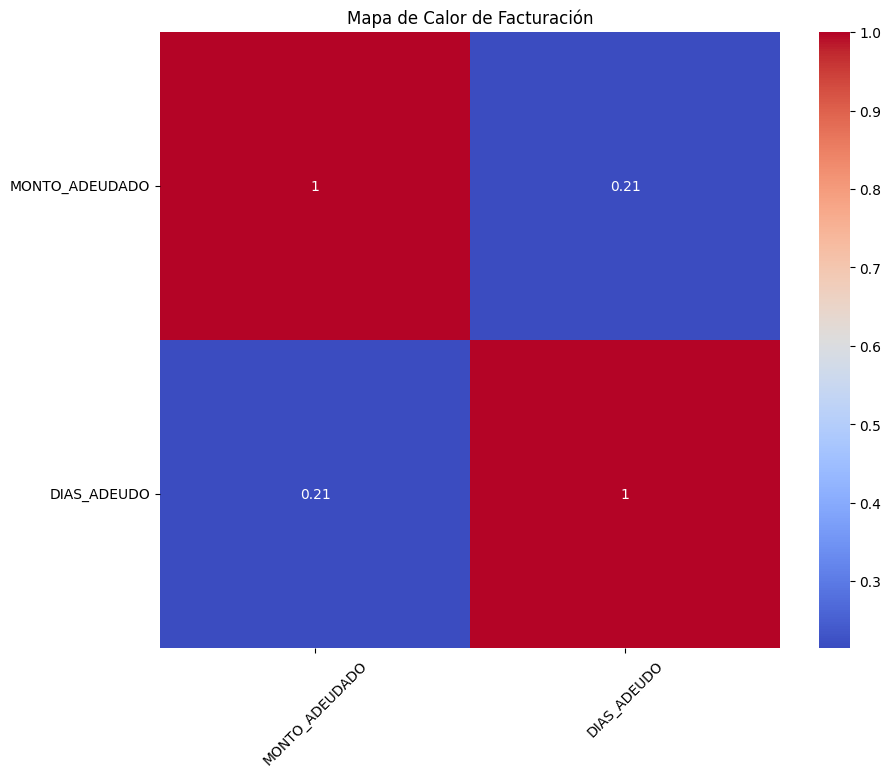

In [ ]:
correlation_matrix = df_saldos.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

#Configuración gráfica
plt.title('Mapa de Calor de Facturación')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.show()

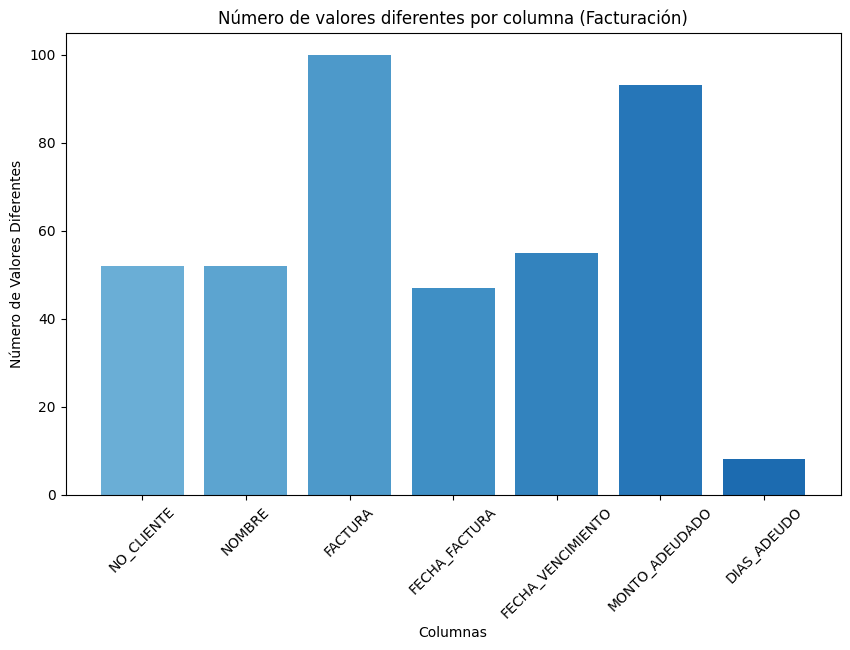

In [ ]:
# Gráfica de valores únicos
unique_values_count = df_saldos.nunique()

blues = plt.cm.Blues(np.linspace(0.5, 1, 12))

plt.figure(figsize=(10, 6))
plt.bar(unique_values_count.index, unique_values_count, color=blues)

plt.xlabel('Columnas')
plt.ylabel('Número de Valores Diferentes')
plt.title('Número de valores diferentes por columna (Facturación)')
plt.xticks(rotation=45)

plt.show()

# **Detalle de precios**

## **Preparación**

In [ ]:
df_precios = pd.read_excel("DETALLE_DE_PRECIOS_LIMPIO.xlsx")
df_precios

,CVE_DOC,FECHA_DOC,NOMBRE_VENDEDOR,NOMBRE_CLIENTE,CANT,CVE_ART,DESCR,PRECIO_UNITARIO,COSTO_UNITARIO,COSTO_UNITARIO_CALCULADO,SUBTOTAL_PARTIDA,COSTO_TOTAL_CALCULADO,MARGEN_UNITARIO_CALCULADO,MARGEN_TOTAL_CALCULADO
0,F37034,2022-01-05,LETICIA RAMIREZ HERNANDEZ,PÚBLICO EN GENERAL,1,TUE00244,"TUB COBRE 5/16""ØX165MM CIRCULA1.5KW127V",434.48,52.80,52.80,434.48,52.80,381.68,381.68
1,F37036,2022-01-05,LETICIA RAMIREZ HERNANDEZ,JUAN ANTONIO RESENDIZ UGALDE,1,TUA00028,"TUA U"" 5/16 ØX250MM 1200W 120V TAP1""NPT",1264.05,327.18,327.18,1264.05,327.18,936.87,936.87
2,F37041,2022-01-05,DIEGO ARMANDO LEON DURAN,ANA BARBARA CRUZ PALACIOS,7,TP0007,TERMOPAR J 3/16 Ø X 1' 1/2 EXT. 7 MT,551.61,177.68,177.68,3861.29,1243.73,373.94,2617.56
3,F37042,2022-01-05,DIEGO ARMANDO LEON DURAN,OMAR RODRIGUEZ GOMEZ,1,TP0001,TERMOPAR J 3/16 Ø X 1' 1/2 EXT. 1 MT,140.00,38.96,38.96,140.00,38.96,101.04,101.04
4,F37043,2022-01-05,LETICIA RAMIREZ HERNANDEZ,PÚBLICO EN GENERAL,2,BP00242,BAN P INOX 115MMX235MM 1000W 127V T/TOR,172.41,101.71,101.71,344.83,203.42,70.71,141.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1421,F39834,2022-12-23,LETICIA RAMIREZ HERNANDEZ,LUIS ENRIQUE PATIÑO PEREZ,6,CS12F1040A00,"CAS INOX 1/2""ØX3"" 400W 127V EXT.30CM",712.00,102.31,102.31,4272.00,613.88,609.69,3658.12
1422,F39834,2022-12-23,LETICIA RAMIREZ HERNANDEZ,LUIS ENRIQUE PATIÑO PEREZ,6,CS12H1050A00,"CAS INOX 1/2""ØX4"" 500W 127V EXT30CM",718.60,104.69,104.69,4311.60,628.12,613.91,3683.48
1423,F39835,2022-12-23,LETICIA RAMIREZ HERNANDEZ,SEVEN DAYS ALL SPORT,3,TUE00394,"TUB INOX 5/16""ØX300MM 5300W 220V ""M"" ESP",2182.35,0.00,596.55,6547.05,1789.64,1585.80,4757.41
1424,F39837,2022-12-23,LETICIA RAMIREZ HERNANDEZ,REVUELTA MONTECARLO,1,TUA00470,"TUB INOX 1/2""ØX500MM 10KW 220V 2 1/2""NPT",5909.84,1884.35,1884.35,5909.84,1884.35,4025.49,4025.49


## **Análisis general**

In [ ]:
df_precios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1426 entries, 0 to 1425
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   CVE_DOC                    1426 non-null   object        
 1   FECHA_DOC                  1426 non-null   datetime64[ns]
 2   NOMBRE_VENDEDOR            1426 non-null   object        
 3   NOMBRE_CLIENTE             1426 non-null   object        
 4   CANT                       1426 non-null   int64         
 5   CVE_ART                    1426 non-null   object        
 6   DESCR                      1426 non-null   object        
 7   PRECIO_UNITARIO            1426 non-null   float64       
 8   COSTO_UNITARIO             1426 non-null   float64       
 9   COSTO_UNITARIO_CALCULADO   1426 non-null   float64       
 10  SUBTOTAL_PARTIDA           1426 non-null   float64       
 11  COSTO_TOTAL_CALCULADO      1426 non-null   float64       
 12  MARGEN

In [ ]:
df_precios.describe()

,CANT,PRECIO_UNITARIO,COSTO_UNITARIO,COSTO_UNITARIO_CALCULADO,SUBTOTAL_PARTIDA,COSTO_TOTAL_CALCULADO,MARGEN_UNITARIO_CALCULADO,MARGEN_TOTAL_CALCULADO
count,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000
mean,4.103787,1517.383065,245.929642,541.512398,4998.883387,1413.020589,975.870722,3585.862910
std,6.142669,2672.195916,1022.514631,5381.759359,8801.260141,5738.785646,5008.509239,8368.502268
min,1.000000,6.540000,0.000000,0.000000,65.350000,0.000000,-166753.380000,-166753.380000
25%,1.000000,528.447500,0.000000,89.882500,952.075000,172.850000,395.465000,681.335000
50%,2.000000,825.000000,77.350000,195.345000,2050.870000,444.135000,637.850000,1521.345000
75%,4.000000,1499.015000,227.180000,377.055000,4884.650000,1292.255000,1073.257500,3531.840000
max,100.000000,32582.180000,33387.050000,199335.560000,77959.200000,199335.560000,27153.660000,68590.880000


## **Gráficas**

### **df_precios**

<Axes: >

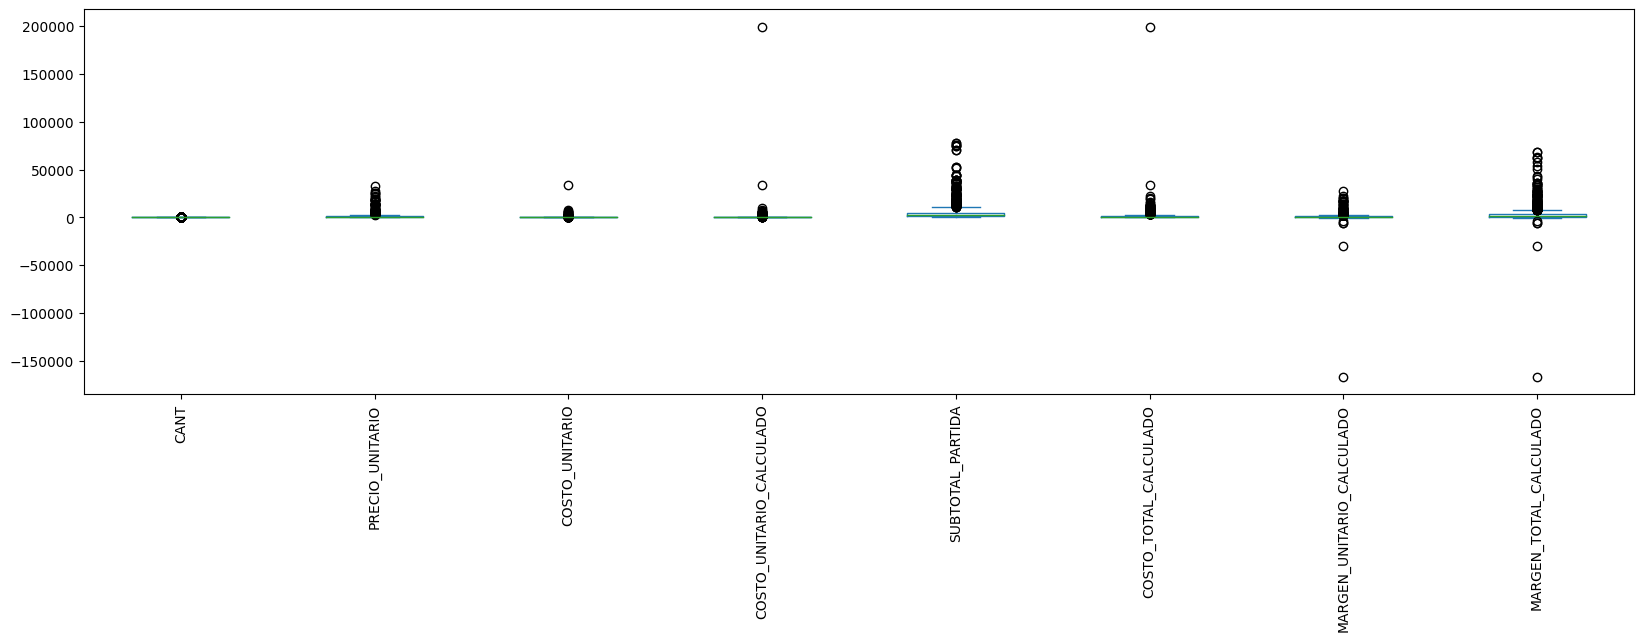

In [ ]:
df_precios.plot.box(figsize=(20,5), rot=90)

<ipython-input-22-7315f0af1edc>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_precios.corr()


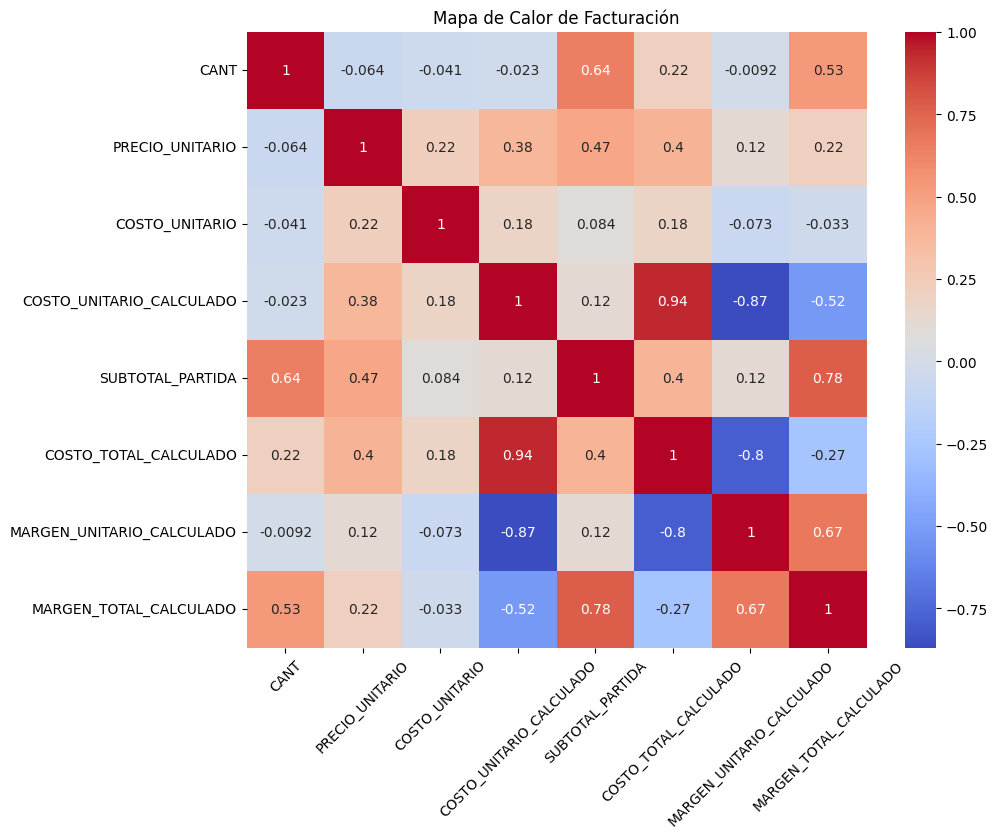

In [ ]:
correlation_matrix = df_precios.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

#Configuración gráfica
plt.title('Mapa de Calor de Facturación')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.show()

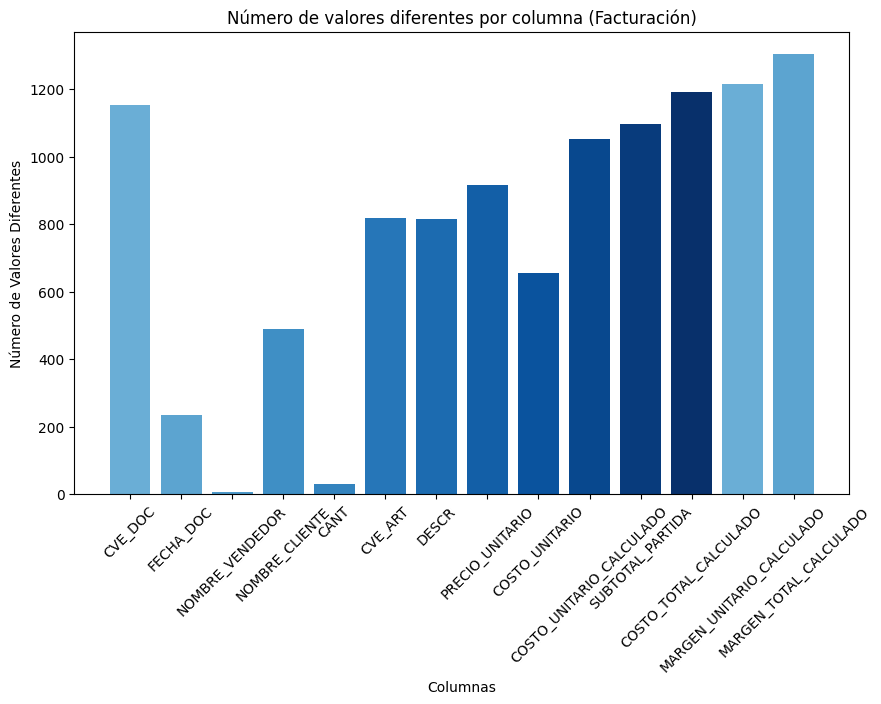

In [ ]:
# Gráfica de valores únicos
unique_values_count = df_precios.nunique()

blues = plt.cm.Blues(np.linspace(0.5, 1, 12))

plt.figure(figsize=(10, 6))
plt.bar(unique_values_count.index, unique_values_count, color=blues)

plt.xlabel('Columnas')
plt.ylabel('Número de Valores Diferentes')
plt.title('Número de valores diferentes por columna (Facturación)')
plt.xticks(rotation=45)

plt.show()

In [ ]:
%%shell
jupyter nbconvert --to html UF6_Act3_Equipo3.ipynb

[NbConvertApp] Converting notebook UF6_Act3_Equipo3.ipynb to html
[NbConvertApp] Writing 2361400 bytes to UF6_Act3_Equipo3.html
